# slurm magics, Mnist using Tensorflow,horovod,mpi4py and cupy

```
We run the "mnist" example using a single and multiple GPUs.  Multigpu 
support is enabled by using Horovod and Mpi4py.

Finally we take an image and blur it using the GPU running Fourier 
transforms from the cupy package.  We progressively increase the blurring.
As the the bluring gets more intense we use the trained network to 
check if we still recognize the image.
```

## 

## Install  slurm magic commands

`
To install the slurm magic commands run the command:
`
```
pip install git+https://github.com/NERSC/slurm-magic.git

```

`
Here is the source:
`

https://github.com/NERSC/slurm-magic/blob/master/slurm_magic.py





In [1]:
#we are using my wall clock timer "included"
from tymer import tymer
tymer(["-i","start"])

1620848922.143556 Wed May 12 13:48:42 2021      0.000      0.000 start


## Load slurm magic commands

In [2]:
%load_ext slurm_magic

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %sacct  %sacctmgr  %salloc  %sattach  %save  %sbatch  %sbcast  %sc  %scancel  %scontrol  %sdiag  %set_env  %sinfo  %slurm  %smap  %sprio  %squeue  %sreport  %srun  %sshare  %sstat  %store  %strigger  %sview  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls

## Run a parallel version of mnist
```
This will use both GPUs with each GPU getting two tasks.

We send output to mnist.err and minst.out.  You can let
the output come back "here" but it is a bit messy.

Note we are running "srun" directly because it is a command
enabled by loading slurm_magic.

We can run this multiple times.  However, if we try to run
it after running the inline example below it will hang because
the inline run ties up the GPUs

```

#### Here is the output from nvidia-smi while this is running:
```

Thu Apr 22 09:57:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:37:00.0 Off |                    0 |
| N/A   47C    P0    63W / 250W |   3754MiB / 16160MiB |     36%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  Off  | 00000000:86:00.0 Off |                    0 |
| N/A   45C    P0    83W / 250W |   3754MiB / 16160MiB |     38%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
|        ID   ID                                                   Usage      |
|=============================================================================|
|    0   N/A  N/A       997      C   python                           1875MiB |
|    0   N/A  N/A       999      C   python                           1875MiB |
|    1   N/A  N/A       998      C   python                           1875MiB |
|    1   N/A  N/A      1000      C   python                           1875MiB |
+-----------------------------------------------------------------------------+
```


In [4]:
ls

checkpoint                         launch_gpu          __pycache__/
checkpoints-1.data-00000-of-00001  libcusolver.so.10@  slurm-6819468.out
checkpoints-1.index                makeit              start
dompi.ipynb                        minst.out           tensorflow2_mnist.py*
done                               mninstcu.ipynb      tymer.py*
dpcu.ipynb                         mnist1.py*
launch_2                           mnist.err


In [5]:
srun -n 4 -e mnist.err -o minst.out ./tensorflow2_mnist.py

''

In [6]:
cat mnist.err

2021-05-12 13:48:44.335969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-12 13:48:44.335965: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-12 13:48:44.335967: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-12 13:48:44.335997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-12 13:48:51.057009: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-12 13:48:51.057011: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-12 13:48:51.057010: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-

In [7]:
cat minst.out

1620848929.587650 Wed May 12 13:48:49 2021      0.000      0.000 start
hello from  2  of  4
gpus  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]  on  r103u21 mpi task  2  of  4
1620848932.700126 Wed May 12 13:48:52 2021      3.112      3.112 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
hvd.local_rank() 2
gpu=  1 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
gpu=  2 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')
gpus detected:  2
1620848969.834391 Wed May 12 13:49:29 2021     40.247     37.134 done
1620848929.587642 Wed May 12 13:48:49 2021      0.000      0.000 start
hello from  1  of  4
gpus  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]  on  r103u21 mpi task  1  of  4
1620848932.700067 Wed M

### Simpler example three different ways
```
Here we run the example from

[https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d]

three different ways.  We run it:
```
- From the command line
- Reading it in as a file and then running exec on the input
- As individual cells within the notebook


In [8]:
!./mnist1.py

SLURM_JOB_GPUS : 0,1
GPU_DEVICE_ORDINAL : 0,1
SLURM_GPUS_PER_NODE : 2
2021-05-12 13:49:32.099905: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
2021-05-12 13:49:34.806052: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-12 13:49:34.810734: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-12 13:49:36.416749: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:37:00.0 name: Tesla V100-PCIE-16GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-12 13:49:36.417391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 


#!/usr/bin/env python
#####!/home/tkaiser2/.conda-envs/dompt/bin/python

#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
import os
for x in os.environ:
   #if x.find("SLURM") > -1 or x.find("gpu") > -1 :
   if x.find("GPU") > -1 or x.find("gpu") > -1 :
        print(x,":",os.environ[x])

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
# Only use this if using iPython
try:
#%matplotlib inline
   pass
except:
    pass
# You may select anything up to 60,000
image_index = 7777 
# The label is 8
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')


x_train.shape



# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal poi

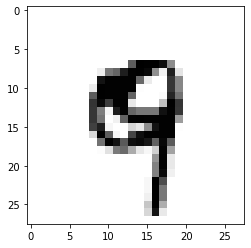

In [9]:
f=open("mnist1.py","r",newline="\n")
bonk=f.read()
for b in bonk.split("\n"):
    print(b)

exec(bonk)


In [10]:
#!/usr/bin/env python
#from:
#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
import os
for x in os.environ:
   #if x.find("SLURM") > -1 or x.find("gpu") > -1 :
   if x.find("GPU") > -1 or x.find("gpu") > -1 :
        print(x,":",os.environ[x])

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

SLURM_JOB_GPUS : 0,1
GPU_DEVICE_ORDINAL : 0,1
SLURM_GPUS_PER_NODE : 2


8


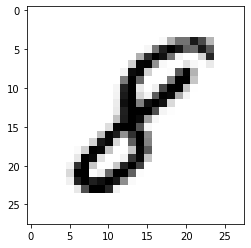

In [11]:
import matplotlib.pyplot as plt
# Only use this if using iPython
try:
#%matplotlib inline
   pass
except:
    pass
# You may select anything up to 60,000
image_index = 7777 
# The label is 8
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3543 - accuracy: 0.8950
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0835 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0596 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0432 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0343 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0306 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0259 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0222 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 10/10
313/313 [==============================] - 0s 969us/step - loss: 0.068

[0.0681806206703186, 0.9829999804496765]

8


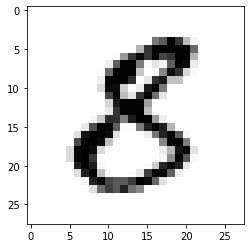

In [16]:
image_index = 1234
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [17]:
# get the cupy gpu package
import cupy as cp
import numpy as np
import time
import sys


In [18]:
# This is the blurring function.  It causes blurring
# by adding random phase variations in Fourier space.
# That is, this is a transfer function that preserves
# overall intensity.

# newimg= IFFT((FFT(image)*BLUR[p]))

from cmath import exp,pi
from random import random

def blur(p):
    return (exp(2*pi*1j*random()*p))

In [19]:
# Get an image
image_index=8888
istart=x_test[image_index].reshape(28, 28)
istart=cp.array(istart)

In [20]:
# Set our blur values
pvals=[0.0,0.01,0.02,0.04,0.08,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80]

In [21]:
# Convert it to Fourier space
# It is useful to have two copies
fspace=cp.fft.fft2(istart)
ospace=cp.fft.fft2(istart)

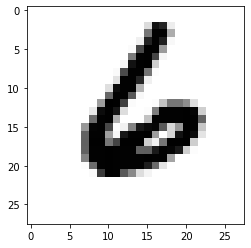

blur= 0.0  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


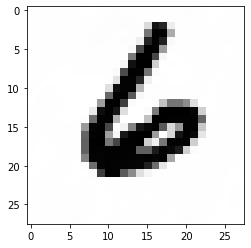

blur= 0.01  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


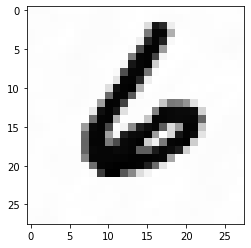

blur= 0.02  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


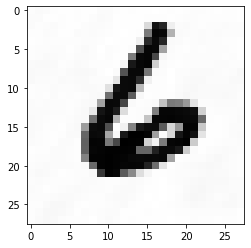

blur= 0.04  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


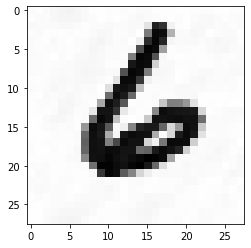

blur= 0.08  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


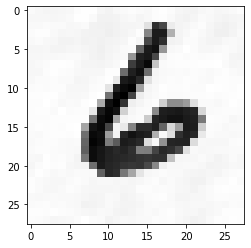

blur= 0.1  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


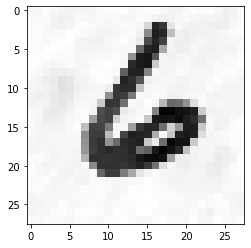

blur= 0.15  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


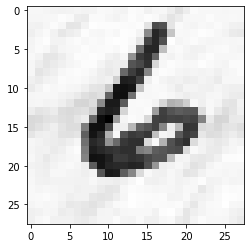

blur= 0.2  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


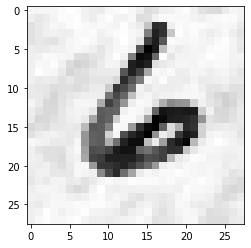

blur= 0.25  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


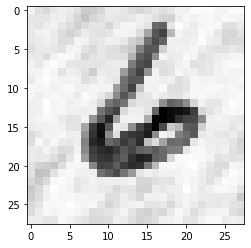

blur= 0.3  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


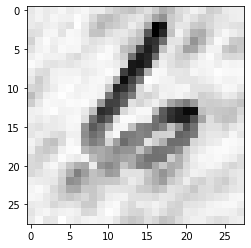

blur= 0.35  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


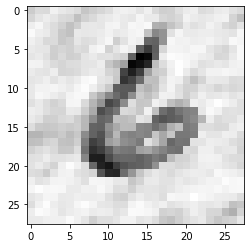

blur= 0.4  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


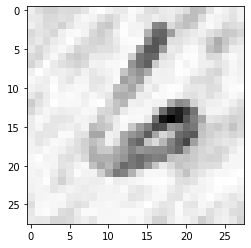

blur= 0.45  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


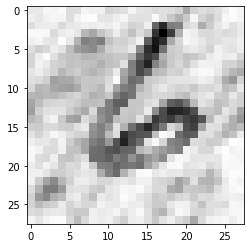

blur= 0.5  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


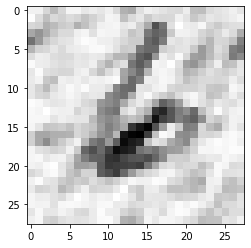

blur= 0.55  0.000 0.000 0.008 0.000 0.000 0.000 0.987 0.000 0.004 0.000 selected= 6


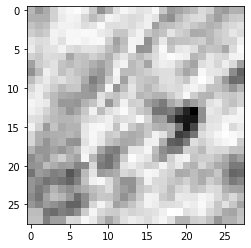

blur= 0.6  0.000 0.000 0.000 0.010 0.009 0.064 0.047 0.000 0.789 0.080 selected= 8


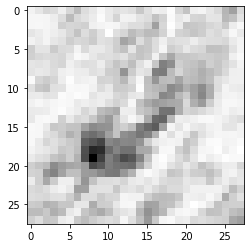

blur= 0.65  0.004 0.000 0.996 0.000 0.000 0.000 0.000 0.000 0.000 0.000 selected= 2


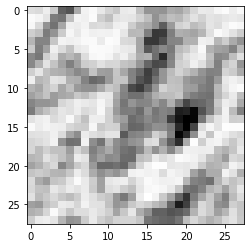

blur= 0.7  0.064 0.000 0.222 0.673 0.000 0.001 0.001 0.016 0.023 0.000 selected= 3


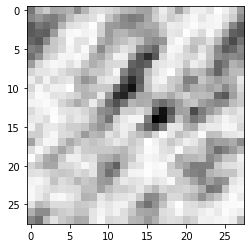

blur= 0.75  0.000 0.000 0.003 0.001 0.000 0.000 0.000 0.000 0.995 0.001 selected= 8


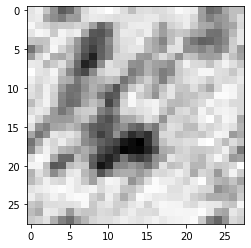

blur= 0.8  0.000 0.000 0.970 0.000 0.000 0.000 0.001 0.000 0.029 0.000 selected= 2


In [22]:
for p in pvals:
    for nx in range(0,28):
        for ny in range(0,28):
            fspace[nx,ny]=ospace[nx,ny]*blur(p)
            newimg=cp.fft.ifft2(fspace)
            newimg=newimg.get()
            newimg=abs(newimg)
    plt.imshow(newimg,cmap='Greys')
    #plt.imshow(newimg)


    plt.show()
    pred = model.predict(newimg.reshape(1, 28, 28, 1))
    print("blur=",p,end=" ")
    digits=pred[0]
    for d in digits:
        print("%6.3f" % (d),end="")
    print(" selected=",pred.argmax())

### script to create the environment with cuda-11, tensorflow 2.4.0, horovod 0.21.3, cupy 9.0.0


In [23]:
cat makeit

#script for build conda environment with various packages including
#jupyter matplotlib scipy pandas xlwt dask tensorflow horovod cupy
#You'll need to change "BASEDIR" then
#
# source makeit
#
CWD=`pwd`
export MYVERSION=may12
#BASEDIR=/scratch/$USER
BASEDIR=/projects/hpcapps/tkaiser
#cd ~
module load conda 2> /dev/null || echo "module load conda failed"
#conda create -p $BASEDIR/exampleenv --name $MYVERSION python=3.8 jupyter matplotlib scipy pandas xlwt dask -y
conda create -p $BASEDIR/$MYVERSION python=3.8 jupyter matplotlib scipy pandas xlwt dask -y

### Don't do conda init
### Just do source activate
source activate 
source activate $BASEDIR/$MYVERSION

which pip
which python

### Install mpi4py
#module load intel-mpi/2020.1.217  2> /dev/null || echo "module load mpi failed"
module load mpt  2> /dev/null || echo "module load mpi failed"
module load gcc/8.4.0  2> /dev/null || echo "module load gcc failed"
pip --no-cache-dir install mpi4py


### Install slurm magic commands 
pip inst

### start the notebook

In [24]:
cat launch_gpu

#!/bin/bash
#SBATCH --job-name="jupyter"
#SBATCH --nodes=1
#SBATCH --account=hpcapps
#SBATCH --time=01:00:00
#SBATCH --gpus-per-node=2 
#SBATCH --partition=debug


export BASEDIR=/projects/hpcapps/tkaiser
export MYVERSION=may12

module load conda
module load mpt
module load cuda/11.2   cudnn/8.1.1/cuda-11.2   gcc/8.4.0

### Don't do conda init
### Just do source activate
source activate 
source activate $BASEDIR/$MYVERSION


#export LD_LIBRARY_PATH=/nopt/nrel/apps/cuda/11.2/targets/x86_64-linux/lib:/nopt/nrel/apps/base/2020-05-12/spack/opt/spack/linux-centos7-x86_64/gcc-4.8.5/gcc-6.5.0-aov4u2ocxtqf4bwif4hc7sga4cvccpxm/lib64:/nopt/nrel/apps/base/2020-05-12/spack/opt/spack/linux-centos7-x86_64/gcc-4.8.5/gcc-6.5.0-aov4u2ocxtqf4bwif4hc7sga4cvccpxm/lib:/nopt/nrel/apps/cudnn/8.1.1-cuda-11.2/lib64:/nopt/nrel/apps/cuda/11.2/lib64:/nopt/mpi/mpt-2.23/lib:/home/tkaiser2/libs/zlib-1.2.11/lib:/home/tkaiser2/libs/bzip2-1.0.8/lib:/home/tkaiser2/bin/jdk-13.0.1/lib:/nopt/slurm/current/lib::

export LD_

### Another way to start a notebook
- we run salloc to get a node
- ssh to our node
- run a script to set up our environment and start jupyter 

```

(/home/tkaiser2/.conda-envs/apr22) el3:newdriver> salloc  --x11 --account=hpcapps --time=1:00:00 --ntasks=8 --cpus-per-task=4 --nodes=1 --gres=gpu:2  bash
salloc: Pending job allocation 6706234
salloc: job 6706234 queued and waiting for resources
salloc: job 6706234 has been allocated resources
salloc: Granted job allocation 6706234
el3:newdriver> sq
JOBID             TIME_LIMIT     TIME_LEFT      NODES START_TIME          PARTITION      REASON         SUBMIT_TIME         NODELIST
6706234           1:00:00        59:47          1     2021-04-22T11:55:02 gpu            None           2021-04-22T11:54:56 r103u15
el3:newdriver> ssh r103u15
Last login: Thu Apr 22 10:44:28 2021 from el2.ib0.cm.hpc.nrel.gov
r103u15:~> cd newdriver/
r103u15:newdriver> . dojup2x

```

In [25]:
tymer(["-i","done"])

1620849067.794134 Wed May 12 13:51:07 2021    145.651    145.651 done
